# Test różnych modeli predykcyjnych na podstawie danych o katastrofie Tytanica

#### Importowanie pakietów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, precision_recall_curve,auc
)
from xgboost import XGBClassifier



#### Wczytanie danych

In [2]:
# Wczytanie danych z pliku XLS (starszy format Excela)
df = pd.read_excel("titanic.xls", engine='xlrd')  # Używamy engine='xlrd' dla plików .xls

# Wstępne sprawdzenie danych
print(df.head())



   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

#### Przegląd ramki danych

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [4]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [5]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


#### Oczyszczenie z brakujących wartosci

In [6]:
df = df.dropna(subset=['fare'])

### Analiza rozkładu ceny biletu i jej zależności od przeżycia

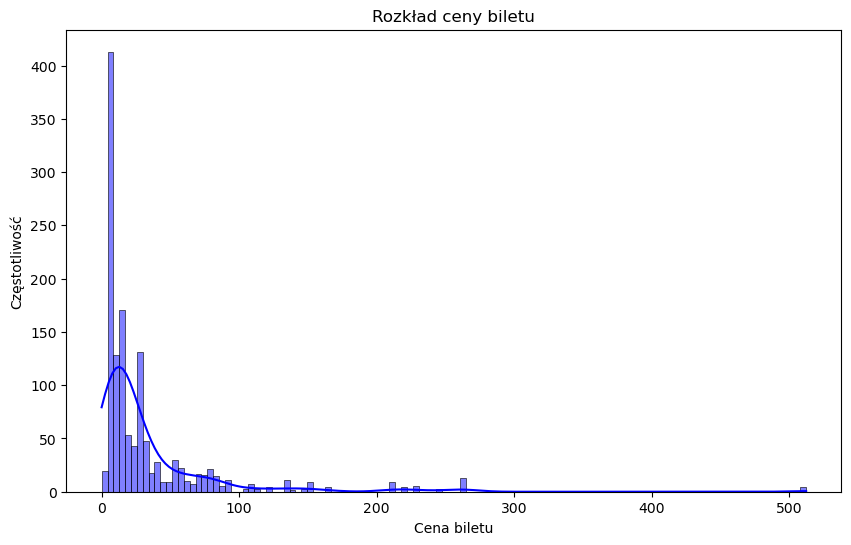

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], kde=True, color='blue')
plt.title('Rozkład ceny biletu')
plt.xlabel('Cena biletu')
plt.ylabel('Częstotliwość')
plt.show()



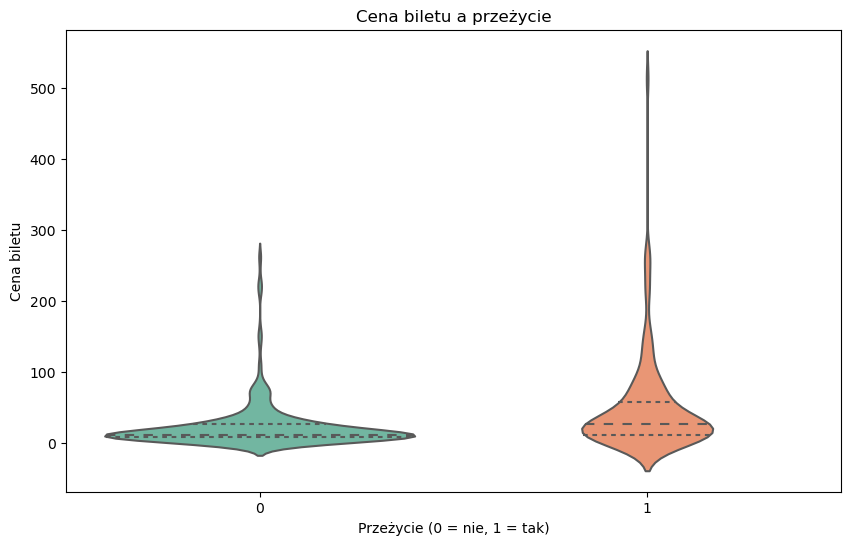

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='fare', data=df, palette='Set2', inner="quartile")
plt.title('Cena biletu a przeżycie')
plt.xlabel('Przeżycie (0 = nie, 1 = tak)')
plt.ylabel('Cena biletu')
plt.show()



#### Przygotowanie danych

In [5]:
X = df[['fare']] 
y = df['survived']  

#### Podział na zestaw treningowy i testowy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Skalowanie danych

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model regresji logistycznej

In [12]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
y_pred_log = log_model.predict(X_test_scaled)

In [14]:
print("\nOcena modelu:")
print(f"Dokładność: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nMacierz błędu:")
print(confusion_matrix(y_test, y_pred_log))
print("\nKlasyfikacja:")
print(classification_report(y_test, y_pred_log))


Ocena modelu:
Dokładność: 0.6361

Macierz błędu:
[[218  12]
 [131  32]]

Klasyfikacja:
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       230
           1       0.73      0.20      0.31       163

    accuracy                           0.64       393
   macro avg       0.68      0.57      0.53       393
weighted avg       0.67      0.64      0.57       393



#### Krzywa ROC

In [17]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

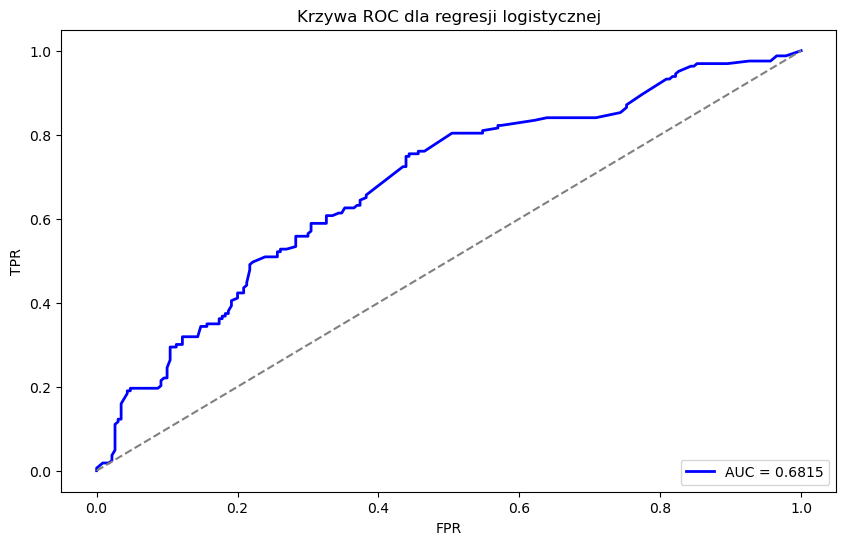

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'AUC = {roc_auc_log:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Krzywa ROC dla regresji logistycznej')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()





### Model drzewa decyzyjnego

In [19]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Ustawiamy max głębokość na 3 dla czytelności
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [20]:
print("Ocena drzewa decyzyjnego:")
print(f"Dokładność: {accuracy_score(y_test, y_pred_tree):.4f}")
print("\nMacierz błędu:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nKlasyfikacja:")
print(classification_report(y_test, y_pred_tree))



Ocena drzewa decyzyjnego:
Dokładność: 0.6361

Macierz błędu:
[[185  45]
 [ 98  65]]

Klasyfikacja:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       230
           1       0.59      0.40      0.48       163

    accuracy                           0.64       393
   macro avg       0.62      0.60      0.60       393
weighted avg       0.63      0.64      0.62       393



#### Krzywa ROC

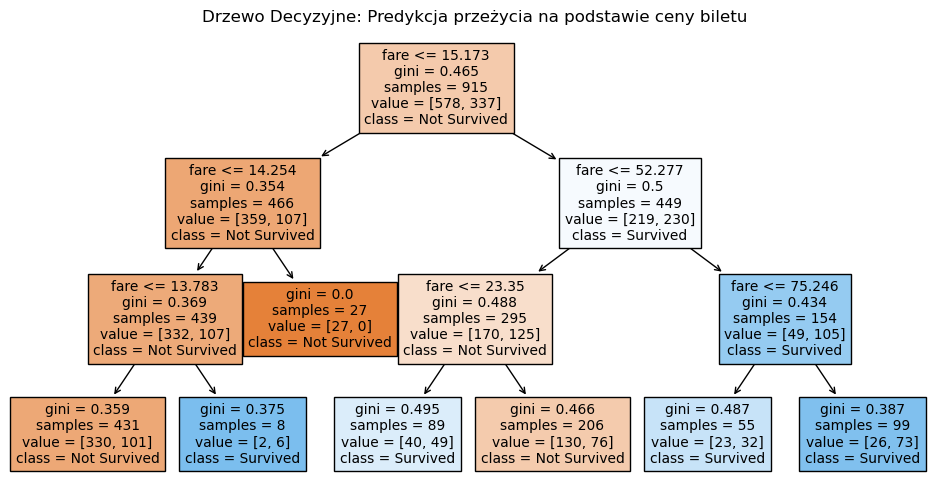

In [21]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=['fare'], class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Drzewo Decyzyjne: Predykcja przeżycia na podstawie ceny biletu")
plt.show()



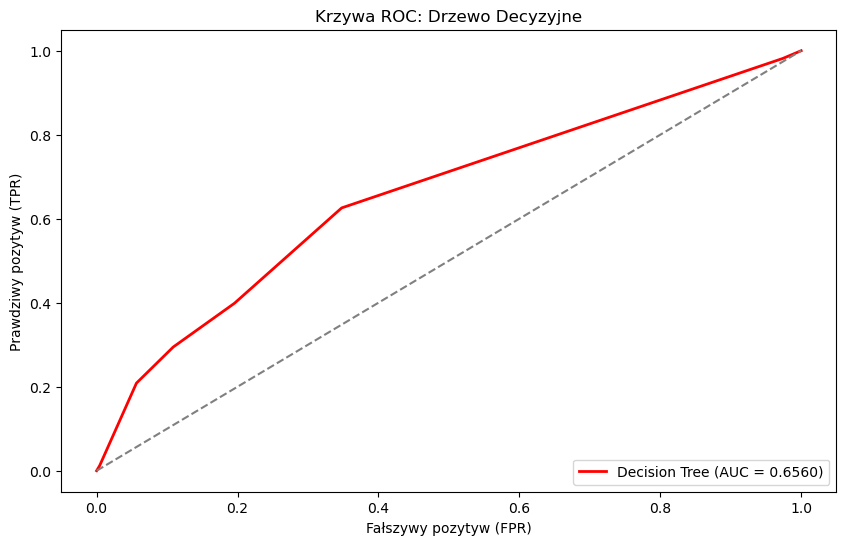

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linia losowego zgadywania
plt.title('Krzywa ROC: Drzewo Decyzyjne')
plt.xlabel('Fałszywy pozytyw (FPR)')
plt.ylabel('Prawdziwy pozytyw (TPR)')
plt.legend(loc='lower right')
plt.show()

### Model lasu losowego

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)

In [25]:
print("\n📌 Random Forest:")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       230
           1       0.62      0.44      0.52       163

    accuracy                           0.66       393
   macro avg       0.65      0.63      0.62       393
weighted avg       0.65      0.66      0.64       393



In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [27]:
print("Ocena lasu losowego:")
print(f"Dokładność: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nMacierz błędu:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nKlasyfikacja:")
print(classification_report(y_test, y_pred_rf))

Ocena lasu losowego:
Dokładność: 0.6565

Macierz błędu:
[[186  44]
 [ 91  72]]

Klasyfikacja:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       230
           1       0.62      0.44      0.52       163

    accuracy                           0.66       393
   macro avg       0.65      0.63      0.62       393
weighted avg       0.65      0.66      0.64       393



#### Krzywa ROC

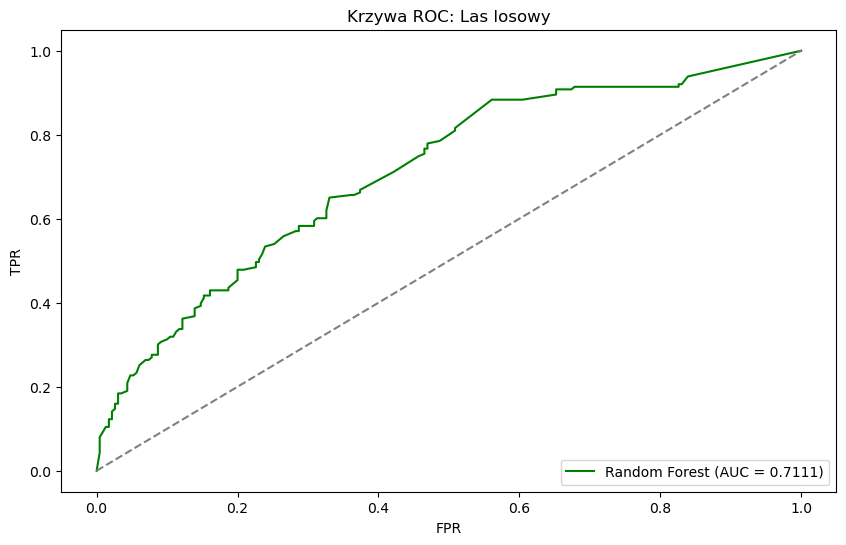

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Krzywa ROC: Las losowy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

### Model XGBoost

In [79]:
xgb_model = XGBClassifier() # Maksymalna głębokość drzewa )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [80]:
y_pred_xgb = xgb_model.predict(X_test)

In [81]:
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       224
           1       0.70      0.40      0.51       169

    accuracy                           0.67       393
   macro avg       0.68      0.64      0.63       393
weighted avg       0.68      0.67      0.65       393



In [82]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

In [83]:
print("Ocena XGBoost:")
print(f"Dokładność: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nMacierz błędu:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nKlasyfikacja:")
print(classification_report(y_test, y_pred_xgb))

Ocena lasu losowego:
Dokładność: 0.6692

Macierz błędu:
[[195  29]
 [101  68]]

Klasyfikacja:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       224
           1       0.70      0.40      0.51       169

    accuracy                           0.67       393
   macro avg       0.68      0.64      0.63       393
weighted avg       0.68      0.67      0.65       393



#### Krzywa ROC

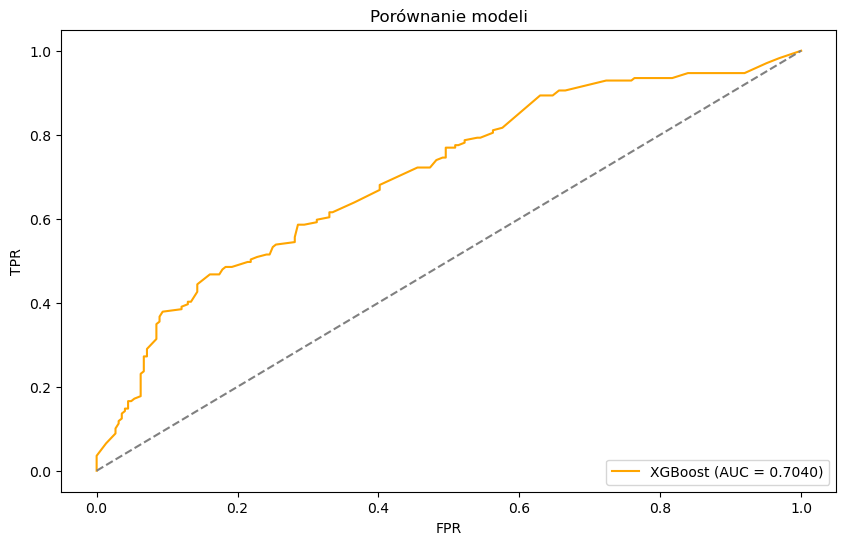

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='orange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Porównanie modeli')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

## Porównanie krzywych

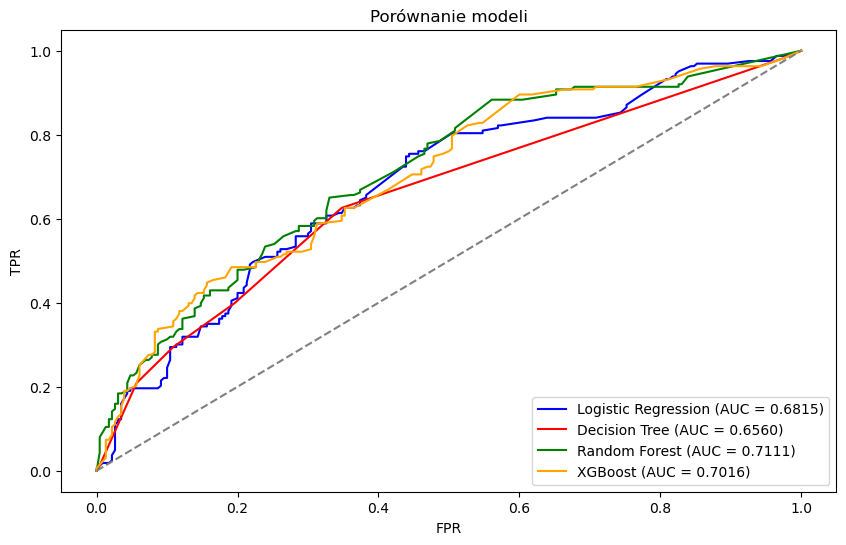

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})', color='blue')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.4f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='orange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Porównanie modeli')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

# Wzięcie pod uwagę płci i klasy

#### Ponowne wczytanie danych

In [87]:
df2 = pd.read_excel("titanic.xls", engine='xlrd')
df2 = df2[['fare', 'pclass', 'sex', 'survived']].dropna()
df2['sex'] = df2['sex'].map({'male': 0, 'female': 1})  

#### Podział na zbiór treningowy i testowy

In [88]:
X = df2[['fare', 'pclass', 'sex']]
y = df2['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Tworzenie i trenowanie modelu lasu losowego

In [104]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [105]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [106]:
print(f"Dokładność: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nMacierz błędu:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nKLasyfikacja:")
print(classification_report(y_test, y_pred_rf))

Dokładność: 0.7863

Macierz błędu:
[[140  16]
 [ 40  66]]

KLasyfikacja:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       156
           1       0.80      0.62      0.70       106

    accuracy                           0.79       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.79      0.79      0.78       262



#### Wizualizacja ważności cech

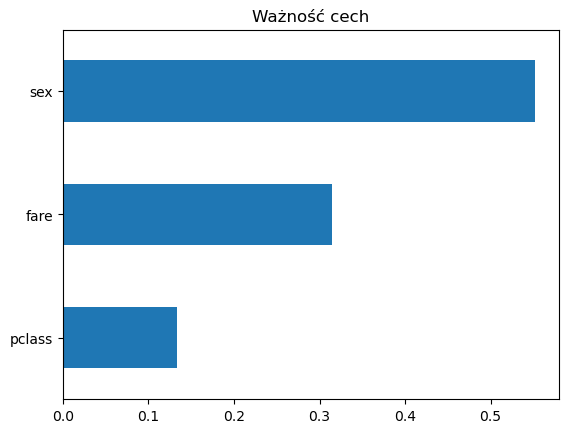

In [107]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title="Ważność cech")
plt.show()

#### Rysowanie krzywej ROC

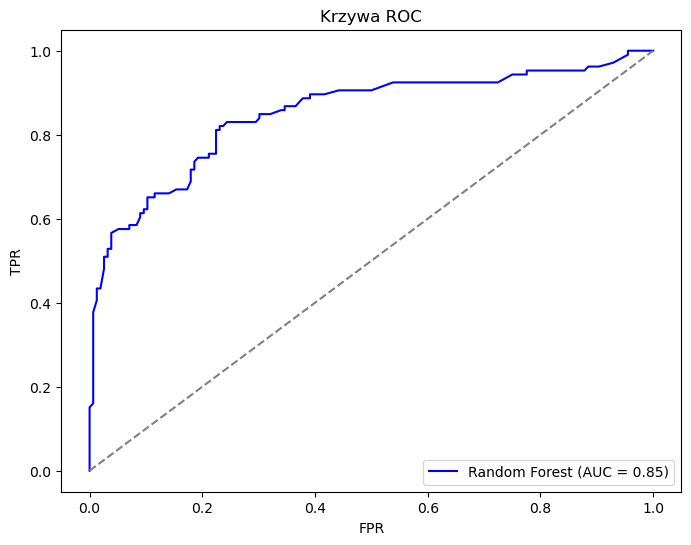

In [108]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.show()
